In [1]:
!pip install gradio


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pickle

In [10]:
import pandas as pd
import json

df_meta = pd.read_csv('F:/Packt/Project - abhinaya/somewhat_cleaned_luxury_beauty_metadata.csv')
df= pd.read_csv("F:/Packt/Project - abhinaya/luxury_beauty_cleaned_reviews_data.csv")

In [14]:
colab_df = df.loc[:,['overall','reviewerID','asin']]#.set_index('reviewerID')


In [51]:
colab_df.to_csv('F:/Packt/Project - abhinaya/colab_df.csv')

In [89]:
matrix = pd.pivot_table(colab_df,values='overall',columns='asin',index='reviewerID').fillna(0)


<AxesSubplot:>

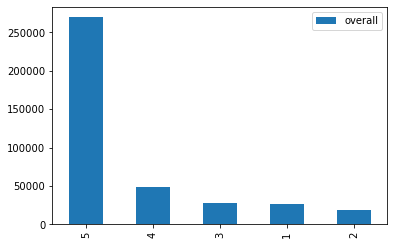

In [7]:
pd.DataFrame(df.overall.value_counts()).plot(kind = 'bar')

In [34]:
matrix

reviewerID,A0313432KNU1BKOKDGWA,A1007OFJTJRYII,A100COZVGEC4IH,A100UD67AHFODS,A100XKI4EGFYQY,A102O8JGTTUSTK,A103PIRYKWQKR7,A107I3YLZJRELX,A108LMMYNGL89M,A10D2KLOQTA1CA,...,AZU6QZESSIEFD,AZUAICKGH4WN1,AZUZ60F698YSK,AZVMWL9E4T9ZD,AZX68WVQOJ9T5,AZY31SPDXGJQ,AZY9AVYFYEHN4,AZZED49ZFAMWU,AZZKNBQAO4Y9Z,AZZT1ERHBSNQ8
asin,,,,,,,,,,,,,,,,,,,,,
B00004U9V2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
B00005V50B,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
B00005V50C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000066SYB,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
B00008WFSM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00011QUKW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000141PYK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000142FVW,5.0,0.0,0.0,5.0,0.0,1.0,0.0,5.0,0.0,0.0,...,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
B0001433OU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
matrix.shape

(23881, 142)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matrix, matrix,test_size=0.33, random_state=42)



In [9]:
X_train.shape

(103943, 2310)

In [10]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=70)
tsvd_products =pd.DataFrame( tsvd.fit_transform(X_train.T), index = X_train.T.index)




In [21]:
tsvd_products  = pd.DataFrame(movie_features, index = X_train.T.index)

compare = tsvd_products[0:1]

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

score = cosine_similarity(tsvd_products, compare)

In [42]:
score = pd.DataFrame(score, index = X_train.T.index).sort_values(by = 0, ascending= False)


In [44]:
score.head(10)

,0
asin,
B00004U9V2,1.000000
B00FRERO7G,0.999341
B00GHX5YVY,0.999119
B0037IESXC,0.996008
B000Z65AZE,0.989494
B00FASVFI8,0.978800
B00K1C8V1W,0.919989
B00KC8TU7O,0.918970
B01H353I8K,0.917890


In [25]:
df

,Unnamed: 0,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,date
0,0,1.0,True,A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,19/2/2015
1,1,4.0,True,A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,18/12/2014
2,2,4.0,True,A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,10/8/2014
3,3,5.0,True,A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,11/3/2013
4,4,5.0,True,A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",25/12/2011
...,...,...,...,...,...,...,...,...,...
371340,371340,1.0,True,A202DCI7TV1022,B01HJEGTYK,Sam,It was awful. It was super frizzy and I tried ...,It was super frizzy and I tried to comb it and...,20/7/2017
371341,371341,5.0,True,A3FSOR5IJOFIBE,B01HJEGTYK,TYW,I was skeptical about buying this. Worried it...,Awesome,16/3/2017
371342,371342,5.0,True,A1B5DK6CTP2P24,B01HJEGTYK,Norma Jennings,Makes me look good fast.,Five Stars,1/3/2017
371343,371343,2.0,True,A23OUYS5IRMJS9,B01HJEGTYK,Lee,Way lighter than photo\nNot mix blend of color...,Ok but color way off and volume as well,21/2/2017


In [51]:
df.reviewerID.value_counts()

A2GJX2KCUSR0EI    27
A1KSC91G9AIY2Z    23
A1EGCED01USBA9    21
A22CW0ZHY3NJH8    21
AENH50GW3OKDA     20
                  ..
AZS19N1UVSKZ7      1
A34T1AXCLO584S     1
A3NCU15954SZSQ     1
AVXW32ZOGE2DI      1
A162452KIJ01MV     1
Name: reviewerID, Length: 324038, dtype: int64

In [48]:
df.groupby('reviewerID')['overall'].value_counts().unstack().fillna(0)

overall,1.0,2.0,3.0,4.0,5.0
reviewerID,,,,,
A0010876CNE3ILIM9HV0,0.0,0.0,0.0,0.0,1.0
A001170867ZBE9FORRQL,0.0,0.0,0.0,0.0,2.0
A0028738FYF1SKPPC7B1,0.0,0.0,0.0,0.0,1.0
A0045356A23634W7RI4M,0.0,0.0,1.0,0.0,0.0
A006277084SDH2LTUV6X,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
AZZW8CF93X1TC,0.0,0.0,0.0,0.0,1.0
AZZWNU4RB5BY1,1.0,0.0,0.0,0.0,0.0
AZZXKG9AGRVGU,0.0,0.0,0.0,0.0,1.0


In [3]:
!pip install surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-win_amd64.whl size=1139629 sha256=3e7c10a69d0b48b615a1964efd014b983780d139275a506748a7fce0770c5a45
  Stored in directory: c:\users\sarth\appdata\local\pip\cache\wheels\af\db\86\2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0


In [15]:
colab_df['userID'] = colab_df['reviewerID']
colab_df['itemID'] = colab_df['asin']
colab_df['rating'] = colab_df['overall']
colab_df.drop(['reviewerID','asin','overall'], axis = 1, inplace = True)

In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(colab_df,colab_df,test_size=0.33, random_state=42)


In [59]:
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import dataset
from surprise import Reader
# from surprise import evaluate, print_perf

alg = SVD(n_epochs = 50,)

# You'll need to create a dummy reader
reader = Reader(line_format='user item rating', rating_scale=(1, 5))


class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['userID'], df['itemID'], df['rating'])]
        self.reader=reader

data = MyDataset(colab_df, reader)



cross_validate(alg, data, measures = ['MAE'], cv = 5, verbose = True)

Evaluating MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.2840  0.2883  0.2907  0.2875  0.2909  0.2883  0.0025  
Fit time          40.10   36.12   40.74   35.21   40.88   38.61   2.43    
Test time         3.63    2.87    3.50    5.09    26.39   8.30    9.08    


{'test_mae': array([0.28400341, 0.28829017, 0.29070777, 0.28749229, 0.29090376]),
 'fit_time': (40.10427117347717,
  36.12138319015503,
  40.74185132980347,
  35.21486783027649,
  40.87808084487915),
 'test_time': (3.6304543018341064,
  2.8680877685546875,
  3.5014586448669434,
  5.091579914093018,
  26.392327308654785)}

In [20]:
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import dataset
from surprise import Reader
alg = SVD(n_epochs = 50,)

In [17]:
from surprise import Dataset, NormalPredictor, Reader
reader = Reader(rating_scale = (0,5))
train_set = Dataset.load_from_df(colab_df, reader=reader).build_full_trainset()
data = Dataset.load_from_df(colab_df, reader=reader)

In [21]:
alg.fit(train_set)

In [46]:
from surprise.dump import dump,load
dump('F:/Packt/Project - abhinaya/svd.pkl', algo = alg)

In [57]:
alg = load('F:/Packt/Project - abhinaya/svd.pkl')

In [28]:
test_set = Dataset.load_from_df(X_test, reader=reader).build_full_trainset()

In [26]:
colab_df

,userID,itemID,rating
0,A2EM03F99X3RJZ,B00004U9V2,5
1,A2EM03F99X3RJZ,B00004U9V2,5
2,A3Z74TDRGD0HU,B00004U9V2,5
3,A3Z74TDRGD0HU,B00004U9V2,5
4,A2UXFNW9RTL4VM,B00004U9V2,5
...,...,...,...
391067,A1FBAQLQTOQT4K,B007D3V1UU,3
391068,A8QULA2ET6BGQ,B007D3V1UU,5
391069,A8QULA2ET6BGQ,B007D3V1UU,5
391070,AQKT85NW8Z5ZP,B007D3V1UU,4


In [104]:
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD

In [21]:
data

In [31]:
colab_df

,userID,itemID,rating
0,A2EM03F99X3RJZ,B00004U9V2,5
1,A2EM03F99X3RJZ,B00004U9V2,5
2,A3Z74TDRGD0HU,B00004U9V2,5
3,A3Z74TDRGD0HU,B00004U9V2,5
4,A2UXFNW9RTL4VM,B00004U9V2,5
...,...,...,...
391067,A1FBAQLQTOQT4K,B007D3V1UU,3
391068,A8QULA2ET6BGQ,B007D3V1UU,5
391069,A8QULA2ET6BGQ,B007D3V1UU,5
391070,AQKT85NW8Z5ZP,B007D3V1UU,4


In [23]:
items = colab_df['itemID'].unique()
test = [['A2EM03F99X3RJZ', iid, 4] for iid in items]
predictions = alg.test(test)
pred = pd.DataFrame(predictions)
pred = pred.sort_values(by='est', ascending=False)
pred.iid.head(10)

1583    B00N0YMMMC
559     B000ULBCHE
362     B000UFWQJI
1722    B00VV8S1GK
87      B0006ZEVUY
1695    B00UJDI6TK
393     B000WM54E8
1693    B00UI3OLZE
1676    B00TFXT0KO
1669    B00SWYOBBU
Name: iid, dtype: object

In [ ]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [115]:
predictions.est

4.426299549140801

In [1]:
import gradio as gr



def predict(user):
    
    
    
    import pandas as pd
    import surprise 
    from surprise.dump import dump,load
    
    colab_df = pd.read_csv('F:/Packt/Project - abhinaya/colab_df.csv')

    alg = load('F:/Packt/Project - abhinaya/svd.pkl')[1]

    items = colab_df['itemID'].unique()
    test = [[user, iid, 4] for iid in items]
    predictions = alg.test(test)
    pred = pd.DataFrame(predictions)
    pred = pred.sort_values(by='est', ascending=False)
    rec = pred.iid.head(10)
    
    return rec

iface = gr.Interface(fn = predict , inputs  = 'text', outputs = 'text')
    
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [19]:
ratings_dict = {'userID': [9, 32, 2, 45, 1],
                'itemID': [1, 1, 1, 2, 2],
                'rating': [3, 2, 4, 3, 1]}
df = pd.DataFrame.from_dict(ratings_dict)


In [20]:
df

,userID,itemID,rating
0,9,1,3
1,32,1,2
2,2,1,4
3,45,2,3
4,1,2,1
